In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
X = 2 * np.random.rand(100, 1)
y= 4 + 3*X + np.random.rand(100, 1)

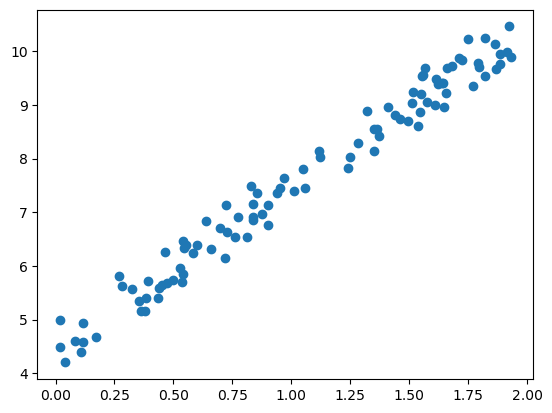

In [34]:
plt.scatter(X, y)

## Finding $\hat{\theta}$ using the normal equation

In [35]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(f"The best value for theta 0: {theta_best[0][0]}")
print(f"The best value fot theta 1: {theta_best[1][0]}")

The best value for theta 0: 4.446179618842898
The best value fot theta 1: 3.008225110079538


Predictions using $\hat{\theta}$

In [36]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.44617962],
       [10.46262984]])

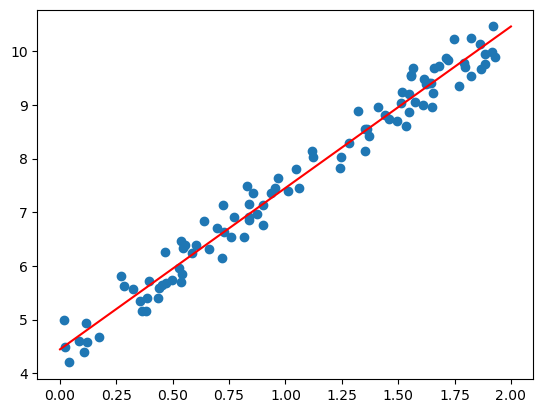

In [37]:
plt.scatter(X, y)
plt.plot(X_new, y_predict, "r-")
plt.show()

## Linear regression using sklearn

In [38]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f"Intercept of the regression: {lin_reg.intercept_[0]}")
print(f"Coeficient of the regression: {lin_reg.coef_[0][0]}")

Intercept of the regression: 4.446179618842905
Coeficient of the regression: 3.0082251100795387


In [39]:
lin_reg.predict(X_new)

array([[ 4.44617962],
       [10.46262984]])

## Gradient descent

In [40]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

In [41]:
for iteration in range(n_iterations):
    gradients = 2/m* X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [42]:
theta

array([[4.44617962],
       [3.00822511]])

## Stochastic Gradient descent

In [43]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t+t1)

In [44]:
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
    

In [45]:
theta

array([[4.45690794],
       [3.01714446]])

In [46]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_[0], sgd_reg.coef_[0]

(4.408774021630025, 2.999505129136625)

## Polynomial Regression

In [47]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + np.random.rand(m,1)

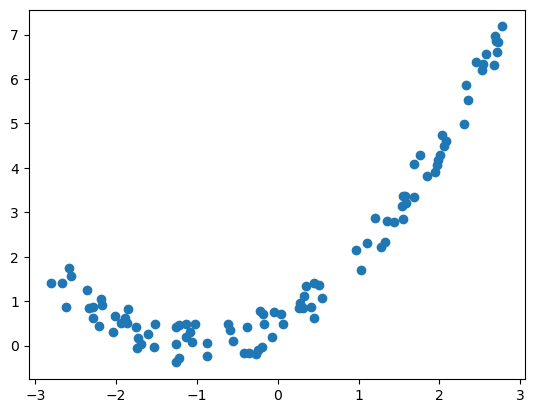

In [48]:
plt.scatter(X, y)
plt.show()

In [49]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([2.52358604]), array([2.52358604, 6.36848649]))

In [50]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([0.53812433]), array([[0.97264557, 0.49255537]]))

In [51]:
X_new = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
y_pred = lin_reg.predict(poly_features.transform(X_new))

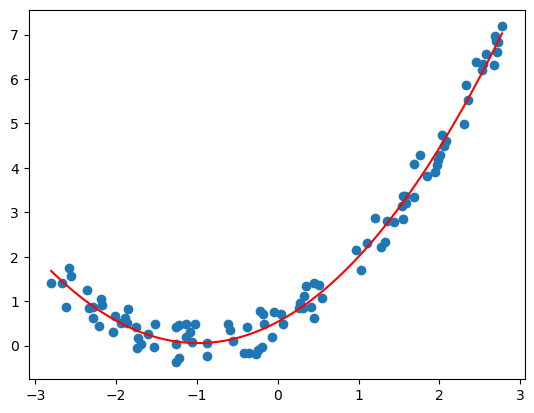

In [52]:
plt.scatter(X, y)
plt.plot(X_new, y_pred, color="red")
plt.show()

## Learning Curves

In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plt_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="validation")
    plt.xlabel("Trainng size")
    plt.ylabel("RMSE")
    plt.legend()

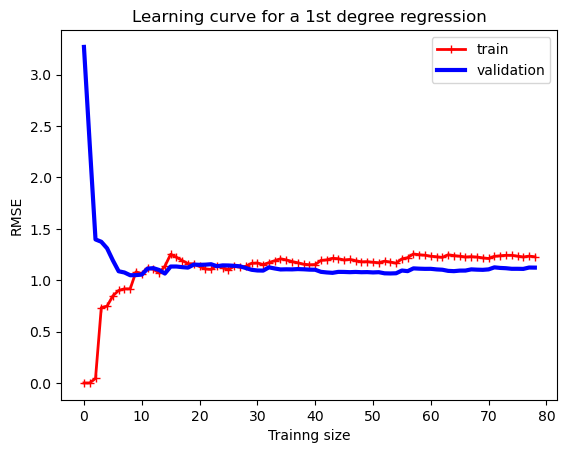

In [54]:
lin_reg = LinearRegression()
plt.title("Learning curve for a 1st degree regression")
plt_learning_curves(lin_reg, X, y)

This learning curve represents a model that is underfitted. When sample sizes are few, the model perfectly guesses the train set, but struggles with the test. As the training size increases, they both reach a plateu, generally symbolizing underfitting

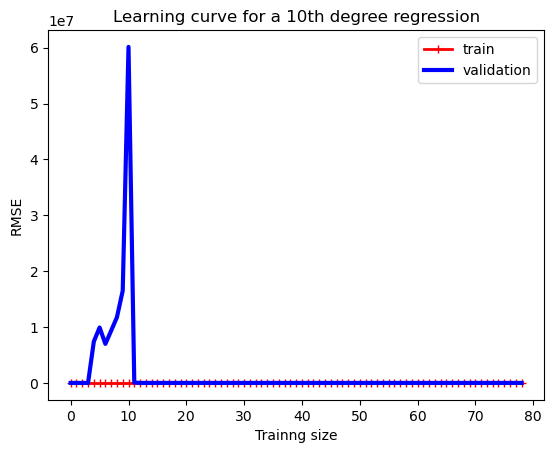

In [55]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()) 
])

plt.title("Learning curve for a 10th degree regression")
plt_learning_curves(polynomial_regression, X, y)

In this model we can see that with a small sample size, the model tends to overfit drastrically. Having an enormous RMSE on the validation set.

## Regularized Linear Models

### Ridge Regression

In [56]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[3.50675908]])

In [57]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([3.47686748])

## Lasso Regression

In [58]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([3.46095589])

In [59]:
sgd_lass = SGDRegressor(penalty="l1")
sgd_lass.fit(X, y.ravel())
sgd_lass.predict([[1.5]])

array([3.48325229])

## Elastic Net

In [60]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([3.46030745])

## Early Stopping

In [62]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [78]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler


poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=0, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005)

In [79]:
minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict= sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

c:\Users\Roi_f\anaconda3\envs\personal\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Roi_f\anaconda3\envs\personal\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Roi_f\anaconda3\envs\personal\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Roi_f\anaconda3\envs\personal\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consid